# [Sub Sandwich Customer Satisfaction Score](https://www.kaggle.com/datasets/kane6543/sub-sandwich-customer-satisfaction-score/data)

This dataset offers a comprehensive look at customer satisfaction levels across various sub sandwich brands. It delves into the nitty-gritty of what makes a sub sandwich experience delightful, covering a wide array of factors such as food quality, service efficiency, ambiance, and overall customer sentiment.

Key features of the dataset include:

Brand Analysis: It compares popular sub sandwich brands, providing insights into how each brand fares in terms of customer satisfaction.

Detailed Metrics: The dataset includes detailed metrics like food appearance, taste quality, ingredient proportions, menu variety, health options, and changes in food quality.

Customer Experience Factors: It assesses elements beyond food, like decor, modernity of the restaurant environment, curb appeal, and whether the environment feels welcoming to the customers.

Quality of Ingredients: Special focus on the freshness and quality of ingredients, including meats, veggies, toppings, and bread.

Customer Value and Perception: Measures how valued customers feel and their willingness to be associated with the brand in a public setting

### - Respondent_Serial:Serial number of Respondent
### - OSAT:Overall Satisfaction Score

In [69]:
import numpy as np
import pandas as pd
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor


import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)


In [70]:
df = pd.read_csv('./data/Sub_Sandwiches_OSAT.csv')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4202 entries, 0 to 4201
Data columns (total 43 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Respondent_Serial                                               4202 non-null   int64  
 1   brand                                                           4202 non-null   object 
 2   OSAT                                                            4202 non-null   int64  
 3   Food looks appetizing                                           4128 non-null   float64
 4   Has food that tastes good                                       4138 non-null   float64
 5   Has food I crave                                                4118 non-null   float64
 6   Provides the right proportions of ingredients                   4123 non-null   float64
 7   Has a wide variety of menu options                 

In [72]:
df.head()

,Respondent_Serial,brand,OSAT,Food looks appetizing,Has food that tastes good,Has food I crave,Provides the right proportions of ingredients,Has a wide variety of menu options,Offers healthy/better-for-you menu options,Is making changes to improve their food,...,Decor is current and modern,Restaurant environment is designed for someone like me,Restaurant has curb appeal,Ingredients are fresh,Ingredients are high quality,Offers good quality meats,Offers good quality veggies and toppings,Uses freshly baked bread,They make me feel valued,Place I am happy to be seen
0,2,Subway,4,6.0,5.0,3.0,3.0,4.0,6.0,2.0,...,4.0,1.0,3.0,5.0,5.0,3.0,5.0,6.0,2.0,3.0
1,2,McDonalds,2,5.0,1.0,4.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0
2,4,Subway,5,4.0,4.0,4.0,5.0,6.0,6.0,NaN,...,3.0,3.0,3.0,6.0,5.0,5.0,5.0,7.0,4.0,4.0
3,4,McDonalds,6,3.0,5.0,5.0,4.0,2.0,1.0,NaN,...,4.0,5.0,4.0,1.0,1.0,1.0,1.0,NaN,4.0,3.0
4,5,Firehouse Subs,5,5.0,4.0,4.0,4.0,5.0,4.0,4.0,...,5.0,4.0,4.0,3.0,5.0,5.0,4.0,5.0,4.0,5.0


In [73]:
df.columns

Index(['Respondent_Serial', 'brand', 'OSAT', 'Food looks appetizing',
       'Has food that tastes good', 'Has food I crave',
       'Provides the right proportions of ingredients',
       'Has a wide variety of menu options',
       'Offers healthy/better-for-you menu options',
       'Is making changes to improve their food',
       'Has a unique, distinctive approach that makes food better',
       'Has a wide range of ingredients',
       'Portions are the right size for my appetite',
       'Has good environmental/sustainability practices', 'Is worth the price',
       'Is something I can afford to eat regularly', 'Is competitively priced',
       'Is a good value for the money', 'Has enticing promotional offers',
       'Has a good loyalty program', 'Employees show care for my food/order',
       'Provides fast service', 'Ordering is simple and easy',
       'Employees are friendly and engaging',
       'Level of visibility of my food being made',
       'I’m able to make my orde

In [74]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Respondent_Serial,4202.0,9570.873156,7153.569636,2.0,4496.25,7105.0,13527.25,24290.0
OSAT,4202.0,5.228939,1.417388,1.0,4.00,5.0,6.00,7.0
Food looks appetizing,4128.0,5.532219,1.358968,1.0,5.00,6.0,7.00,7.0
Has food that tastes good,4138.0,5.541083,1.347297,1.0,5.00,6.0,7.00,7.0
Has food I crave,4118.0,5.254007,1.558690,1.0,4.00,6.0,7.00,7.0
Provides the right proportions of ingredients,4123.0,5.325734,1.396566,1.0,4.00,5.0,6.00,7.0
Has a wide variety of menu options,4135.0,5.369770,1.372515,1.0,5.00,6.0,6.00,7.0
Offers healthy/better-for-you menu options,4080.0,5.243137,1.457648,1.0,4.00,5.0,6.00,7.0
Is making changes to improve their food,3848.0,5.132536,1.451800,1.0,4.00,5.0,6.00,7.0
"Has a unique, distinctive approach that makes food better",4051.0,5.114046,1.490655,1.0,4.00,5.0,6.00,7.0


In [75]:
df.isnull().sum()


Respondent_Serial                                                   0
brand                                                               0
OSAT                                                                0
Food looks appetizing                                              74
Has food that tastes good                                          64
Has food I crave                                                   84
Provides the right proportions of ingredients                      79
Has a wide variety of menu options                                 67
Offers healthy/better-for-you menu options                        122
Is making changes to improve their food                           354
Has a unique, distinctive approach that makes food better         151
Has a wide range of ingredients                                    78
Portions are the right size for my appetite                        82
Has good environmental/sustainability practices                   471
Is worth the price  

In [76]:
df.columns

Index(['Respondent_Serial', 'brand', 'OSAT', 'Food looks appetizing',
       'Has food that tastes good', 'Has food I crave',
       'Provides the right proportions of ingredients',
       'Has a wide variety of menu options',
       'Offers healthy/better-for-you menu options',
       'Is making changes to improve their food',
       'Has a unique, distinctive approach that makes food better',
       'Has a wide range of ingredients',
       'Portions are the right size for my appetite',
       'Has good environmental/sustainability practices', 'Is worth the price',
       'Is something I can afford to eat regularly', 'Is competitively priced',
       'Is a good value for the money', 'Has enticing promotional offers',
       'Has a good loyalty program', 'Employees show care for my food/order',
       'Provides fast service', 'Ordering is simple and easy',
       'Employees are friendly and engaging',
       'Level of visibility of my food being made',
       'I’m able to make my orde

In [77]:
df_null_ratio = pd.DataFrame({'Null_Ratio': [df[_].isnull().sum() / len(df[_]) for _ in df.columns]}, index=df.columns)


In [78]:
df_null_ratio

,Null_Ratio
Respondent_Serial,0.000000
brand,0.000000
OSAT,0.000000
Food looks appetizing,0.017611
Has food that tastes good,0.015231
Has food I crave,0.019990
Provides the right proportions of ingredients,0.018801
Has a wide variety of menu options,0.015945
Offers healthy/better-for-you menu options,0.029034
Is making changes to improve their food,0.084246


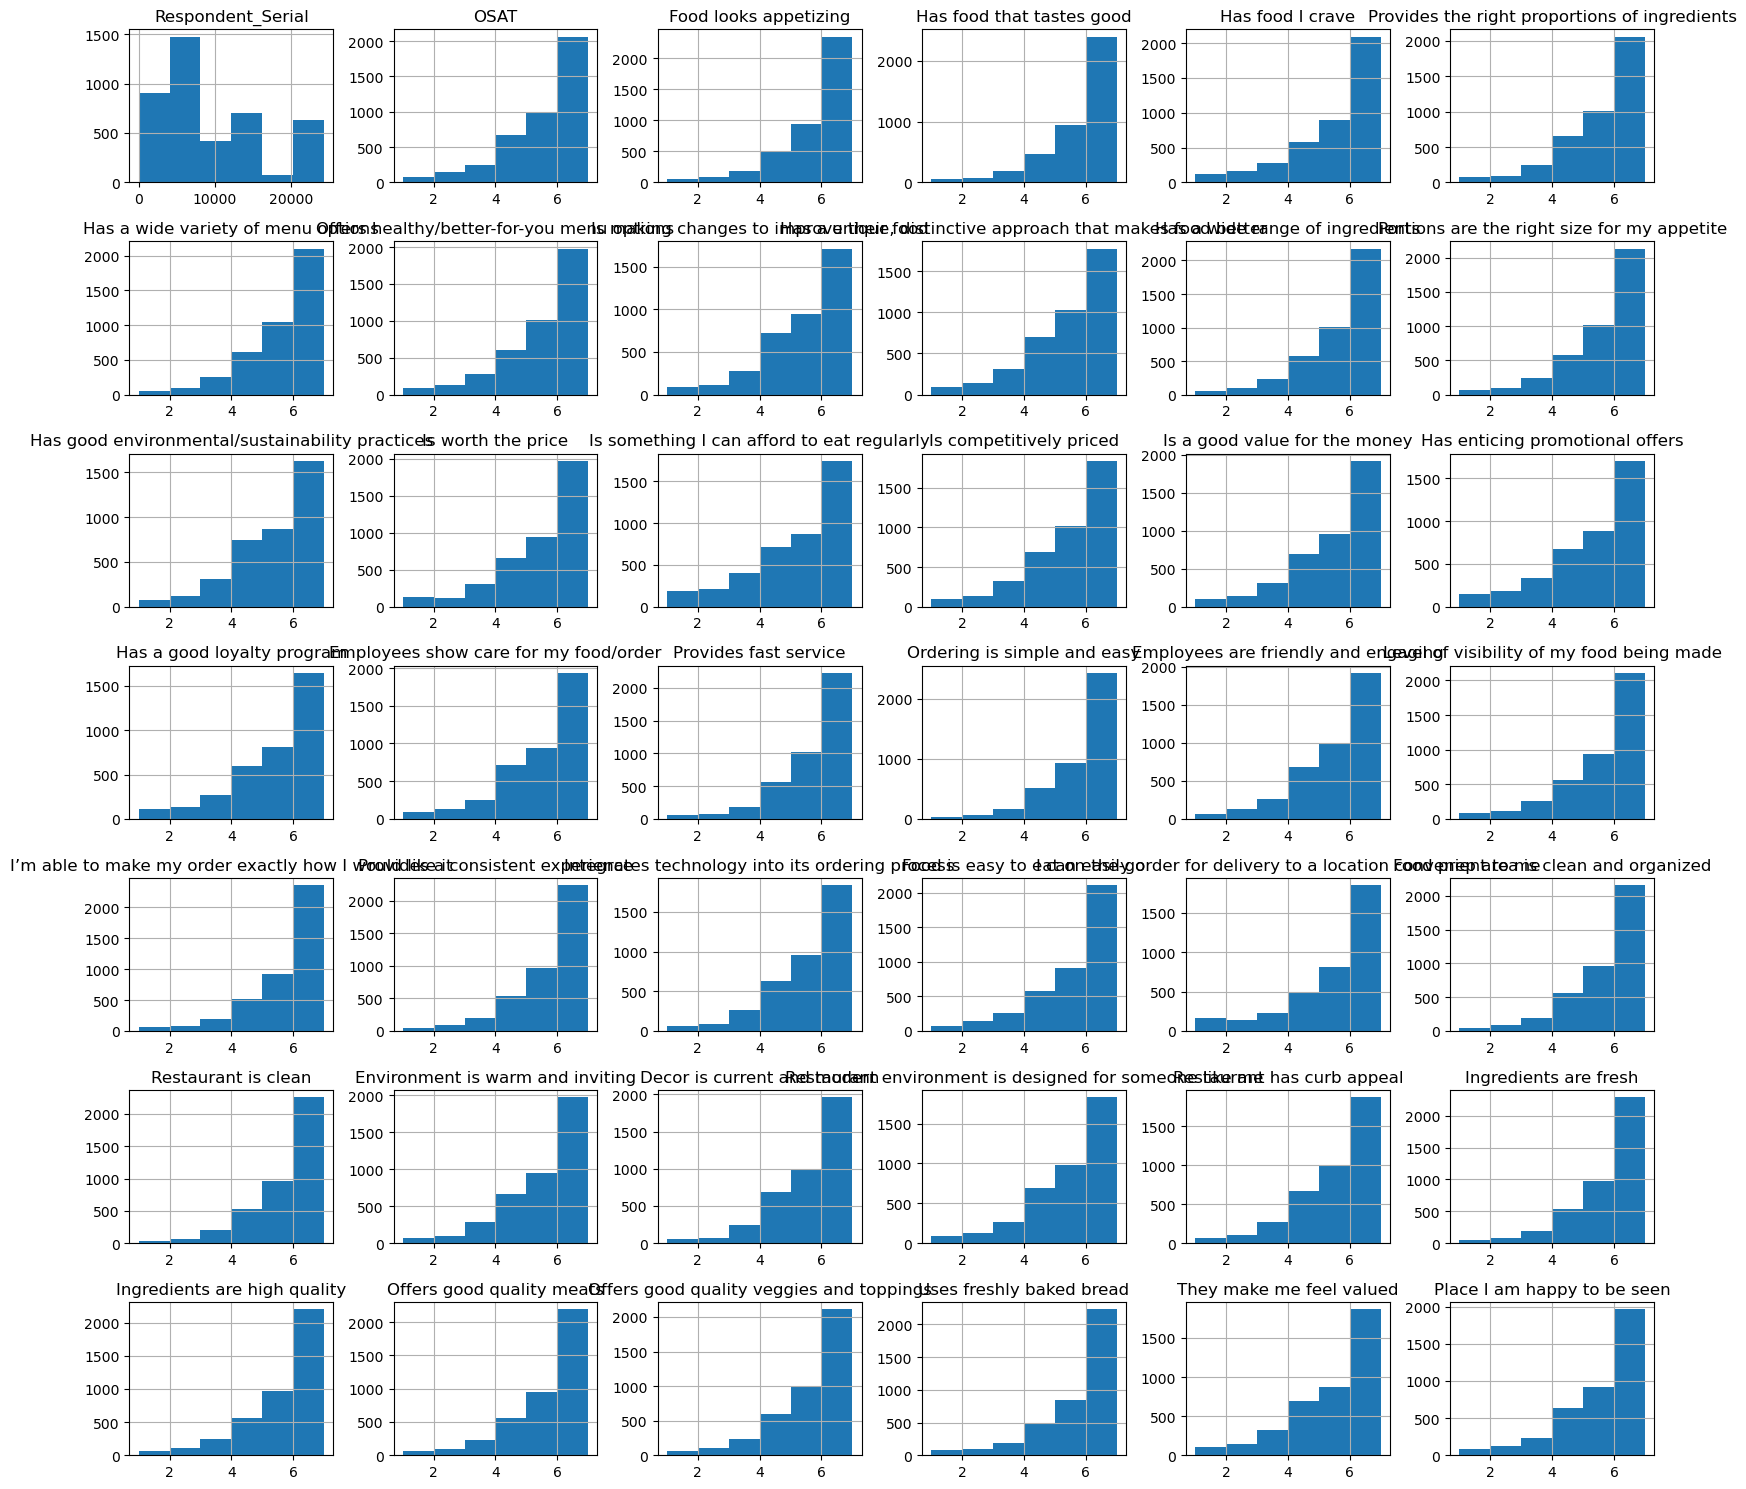

In [79]:
df.hist(bins=6, figsize=(16,15))
plt.tight_layout()
plt.show()

In [80]:
df[df.columns[3:]].median()  # use median to fill in missing values because of these skewness

Food looks appetizing                                             6.0
Has food that tastes good                                         6.0
Has food I crave                                                  6.0
Provides the right proportions of ingredients                     5.0
Has a wide variety of menu options                                6.0
Offers healthy/better-for-you menu options                        5.0
Is making changes to improve their food                           5.0
Has a unique, distinctive approach that makes food better         5.0
Has a wide range of ingredients                                   6.0
Portions are the right size for my appetite                       6.0
Has good environmental/sustainability practices                   5.0
Is worth the price                                                5.0
Is something I can afford to eat regularly                        5.0
Is competitively priced                                           5.0
Is a good value for 

In [81]:
df_filling = df[df.columns[3:]].fillna(df[df.columns[3:]].median())

In [82]:
df_filled = pd.concat([df[df.columns[:3]], df_filling], axis=1)

In [83]:
df_filled

,Respondent_Serial,brand,OSAT,Food looks appetizing,Has food that tastes good,Has food I crave,Provides the right proportions of ingredients,Has a wide variety of menu options,Offers healthy/better-for-you menu options,Is making changes to improve their food,...,Decor is current and modern,Restaurant environment is designed for someone like me,Restaurant has curb appeal,Ingredients are fresh,Ingredients are high quality,Offers good quality meats,Offers good quality veggies and toppings,Uses freshly baked bread,They make me feel valued,Place I am happy to be seen
0,2,Subway,4,6.0,5.0,3.0,3.0,4.0,6.0,2.0,...,4.0,1.0,3.0,5.0,5.0,3.0,5.0,6.0,2.0,3.0
1,2,McDonalds,2,5.0,1.0,4.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0
2,4,Subway,5,4.0,4.0,4.0,5.0,6.0,6.0,5.0,...,3.0,3.0,3.0,6.0,5.0,5.0,5.0,7.0,4.0,4.0
3,4,McDonalds,6,3.0,5.0,5.0,4.0,2.0,1.0,5.0,...,4.0,5.0,4.0,1.0,1.0,1.0,1.0,6.0,4.0,3.0
4,5,Firehouse Subs,5,5.0,4.0,4.0,4.0,5.0,4.0,4.0,...,5.0,4.0,4.0,3.0,5.0,5.0,4.0,5.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197,24241,Jersey Mikes,7,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
4198,24287,Subway,1,6.0,6.0,6.0,5.0,6.0,5.0,5.0,...,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0
4199,24287,Panera,3,6.0,4.0,2.0,4.0,5.0,5.0,5.0,...,6.0,3.0,5.0,5.0,4.0,6.0,6.0,4.0,5.0,5.0
4200,24290,Jersey Mikes,4,2.0,6.0,6.0,5.0,3.0,7.0,3.0,...,7.0,6.0,4.0,7.0,3.0,5.0,5.0,6.0,6.0,6.0


In [84]:
df_filled.isnull().sum()

Respondent_Serial                                                 0
brand                                                             0
OSAT                                                              0
Food looks appetizing                                             0
Has food that tastes good                                         0
Has food I crave                                                  0
Provides the right proportions of ingredients                     0
Has a wide variety of menu options                                0
Offers healthy/better-for-you menu options                        0
Is making changes to improve their food                           0
Has a unique, distinctive approach that makes food better         0
Has a wide range of ingredients                                   0
Portions are the right size for my appetite                       0
Has good environmental/sustainability practices                   0
Is worth the price                              

In [85]:
df_filled['Respondent_Serial'].value_counts()

Respondent_Serial
2        2
12332    2
12316    2
12299    2
12298    2
        ..
13901    1
5885     1
6707     1
130      1
3878     1
Name: count, Length: 2115, dtype: int64

In [86]:
# counts_2 = df.groupby('Respondent_Serial')['brand'].nunique() 

In [87]:
df_filled['brand'].value_counts()

brand
Subway            601
Jimmy Johns       601
McDonalds         600
Firehouse Subs    600
Panera            600
Chipotle          600
Jersey Mikes      600
Name: count, dtype: int64

In [88]:
brands = df_filled['brand'].unique()

In [89]:
brands

array(['Subway', 'McDonalds', 'Firehouse Subs', 'Panera', 'Jimmy Johns',
       'Chipotle', 'Jersey Mikes'], dtype=object)

In [90]:
df_dict = {_: df_filled.query(f"brand == '{_}'") for _ in brands}

In [91]:
[df_dict[ _ ]['Respondent_Serial'].duplicated().sum() for _ in brands] # duplicated serial numbers check
# one person review 2 brands

[0, 0, 0, 0, 0, 0, 0]

In [92]:
df_all = df_filled.copy()

In [93]:
df_dict['Subway']

,Respondent_Serial,brand,OSAT,Food looks appetizing,Has food that tastes good,Has food I crave,Provides the right proportions of ingredients,Has a wide variety of menu options,Offers healthy/better-for-you menu options,Is making changes to improve their food,...,Decor is current and modern,Restaurant environment is designed for someone like me,Restaurant has curb appeal,Ingredients are fresh,Ingredients are high quality,Offers good quality meats,Offers good quality veggies and toppings,Uses freshly baked bread,They make me feel valued,Place I am happy to be seen
0,2,Subway,4,6.0,5.0,3.0,3.0,4.0,6.0,2.0,...,4.0,1.0,3.0,5.0,5.0,3.0,5.0,6.0,2.0,3.0
2,4,Subway,5,4.0,4.0,4.0,5.0,6.0,6.0,5.0,...,3.0,3.0,3.0,6.0,5.0,5.0,5.0,7.0,4.0,4.0
8,10,Subway,6,7.0,7.0,7.0,6.0,6.0,6.0,6.0,...,6.0,5.0,6.0,6.0,7.0,6.0,6.0,7.0,6.0,6.0
19,21,Subway,7,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
21,22,Subway,5,6.0,6.0,6.0,5.0,5.0,6.0,5.0,...,6.0,6.0,5.0,6.0,6.0,5.0,6.0,7.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4168,23627,Subway,6,7.0,5.0,7.0,6.0,6.0,6.0,6.0,...,6.0,6.0,6.0,7.0,5.0,5.0,6.0,6.0,6.0,7.0
4180,24180,Subway,7,7.0,7.0,7.0,7.0,7.0,6.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
4182,24182,Subway,5,6.0,5.0,6.0,5.0,5.0,5.0,6.0,...,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0
4184,24186,Subway,4,5.0,6.0,5.0,6.0,5.0,5.0,4.0,...,4.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0


In [94]:
X = df_dict['Subway'].drop(['Respondent_Serial', 'brand', 'OSAT'], axis=1)
y = df_dict['Subway']['OSAT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Decision Tree Regressor

In [95]:
dt_reg = DecisionTreeRegressor()

In [96]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [97]:
reg_feature_importance = dt_reg.feature_importances_

In [98]:
df_reg_feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': reg_feature_importance})

In [99]:
df_reg_feature_importance = df_reg_feature_importance.sort_values(by='importance', ascending=False)

<Axes: xlabel='feature'>

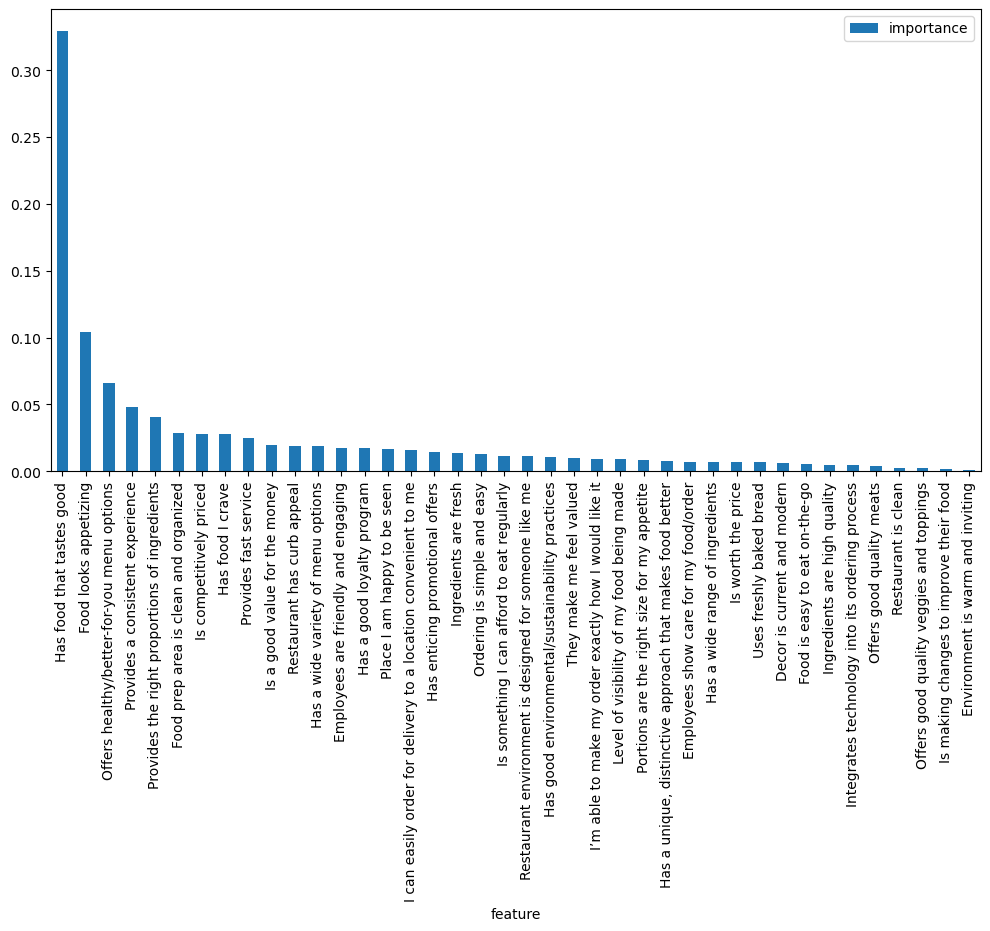

In [100]:
df_reg_feature_importance.plot(kind='bar', x='feature', y='importance', figsize=(12, 6))

In [101]:
df_reg_feature_importance.head()

,feature,importance
1,Has food that tastes good,0.329272
0,Food looks appetizing,0.104252
5,Offers healthy/better-for-you menu options,0.066297
23,Provides a consistent experience,0.048307
3,Provides the right proportions of ingredients,0.040435


In [102]:
y_pred = dt_reg.predict(X_test)

In [103]:
mse = mean_squared_error(y_test, y_pred)
R2_Score = r2_score(y_test, y_pred)

In [104]:
mse,R2_Score  # bad result

(1.6859504132231404, 0.14184397163120566)

### Random Forest Regressor

In [105]:
rf_reg = RandomForestRegressor()

In [106]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [107]:
reg_feature_importance = rf_reg.feature_importances_

In [108]:
df_reg_feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': reg_feature_importance}).sort_values(by='importance', ascending=False)

In [109]:
y_pred = rf_reg.predict(X_test)

In [110]:
mse = mean_squared_error(y_test, y_pred)

In [115]:
R2_Score = r2_score(y_test,y_pred)

In [117]:
mse,R2_Score # bad result

(0.9565431205234161, 0.5131154280495295)

### Xgboost Regressor

In [121]:
from xgboost import XGBRegressor

In [122]:
xgb_reg = XGBRegressor()

In [123]:
xgb_reg.fit(X_train, y_train)
reg_feature_importance = xgb_reg.feature_importances_

In [124]:
df_reg_feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': reg_feature_importance}).sort_values(by='importance', ascending=False)

In [125]:
y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
R2_Score = r2_score(y_test,y_pred)

In [126]:
mse,R2_Score # bad result

(0.9565431205234161, 0.5131154280495295)

### AdaBoost Regressor

In [128]:
from sklearn.ensemble import AdaBoostRegressor

In [129]:
ada_reg = AdaBoostRegressor()
xgb_reg.fit(X_train, y_train)
reg_feature_importance = xgb_reg.feature_importances_
df_reg_feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': reg_feature_importance}).sort_values(by='importance', ascending=False)

In [130]:
y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
R2_Score = r2_score(y_test,y_pred)

In [131]:
mse,R2_Score # bad result

(0.9565431205234161, 0.5131154280495295)

In [145]:
corr_matrix = df_dict['Subway'].drop(['Respondent_Serial','brand'], axis=1).corr()

In [147]:
corr_matrix['OSAT'].sort_values(ascending=False)

OSAT                                                              1.000000
Has food that tastes good                                         0.682498
Has food I crave                                                  0.656178
Food looks appetizing                                             0.633931
Ingredients are fresh                                             0.628030
Offers good quality meats                                         0.622701
Ingredients are high quality                                      0.621567
Provides a consistent experience                                  0.618791
They make me feel valued                                          0.608447
Place I am happy to be seen                                       0.605918
Is a good value for the money                                     0.596643
Has a unique, distinctive approach that makes food better         0.590632
Provides the right proportions of ingredients                     0.587632
Environment is warm and i

In [148]:
selected_features_50 = corr_matrix[corr_matrix['OSAT'].sort_values(ascending=False) > 0.5].index

/var/folders/9h/gh5zy8tj3xl95bg3c5mbjmpc0000gn/T/ipykernel_42455/989912536.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_features_50 = corr_matrix[corr_matrix['OSAT'].sort_values(ascending=False) > 0.5].index


In [149]:
df_dict['Subway'][selected_features_50]

,OSAT,Food looks appetizing,Has food that tastes good,Has food I crave,Provides the right proportions of ingredients,Has a wide variety of menu options,Offers healthy/better-for-you menu options,Is making changes to improve their food,"Has a unique, distinctive approach that makes food better",Has a wide range of ingredients,...,Decor is current and modern,Restaurant environment is designed for someone like me,Restaurant has curb appeal,Ingredients are fresh,Ingredients are high quality,Offers good quality meats,Offers good quality veggies and toppings,Uses freshly baked bread,They make me feel valued,Place I am happy to be seen
0,4,6.0,5.0,3.0,3.0,4.0,6.0,2.0,1.0,3.0,...,4.0,1.0,3.0,5.0,5.0,3.0,5.0,6.0,2.0,3.0
2,5,4.0,4.0,4.0,5.0,6.0,6.0,5.0,5.0,6.0,...,3.0,3.0,3.0,6.0,5.0,5.0,5.0,7.0,4.0,4.0
8,6,7.0,7.0,7.0,6.0,6.0,6.0,6.0,5.0,6.0,...,6.0,5.0,6.0,6.0,7.0,6.0,6.0,7.0,6.0,6.0
19,7,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
21,5,6.0,6.0,6.0,5.0,5.0,6.0,5.0,6.0,6.0,...,6.0,6.0,5.0,6.0,6.0,5.0,6.0,7.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4168,6,7.0,5.0,7.0,6.0,6.0,6.0,6.0,5.0,6.0,...,6.0,6.0,6.0,7.0,5.0,5.0,6.0,6.0,6.0,7.0
4180,7,7.0,7.0,7.0,7.0,7.0,6.0,7.0,7.0,7.0,...,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
4182,5,6.0,5.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0,...,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0
4184,4,5.0,6.0,5.0,6.0,5.0,5.0,4.0,4.0,5.0,...,4.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0


In [150]:
X = df_dict['Subway'][selected_features_50].drop('OSAT', axis=1)
y = df_dict['Subway']['OSAT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
dt_reg = DecisionTreeRegressor()

In [152]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [153]:
reg_feature_importance = dt_reg.feature_importances_

In [154]:
df_reg_feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': reg_feature_importance})

In [155]:
df_reg_feature_importance = df_reg_feature_importance.sort_values(by='importance', ascending=False)

<Axes: xlabel='feature'>

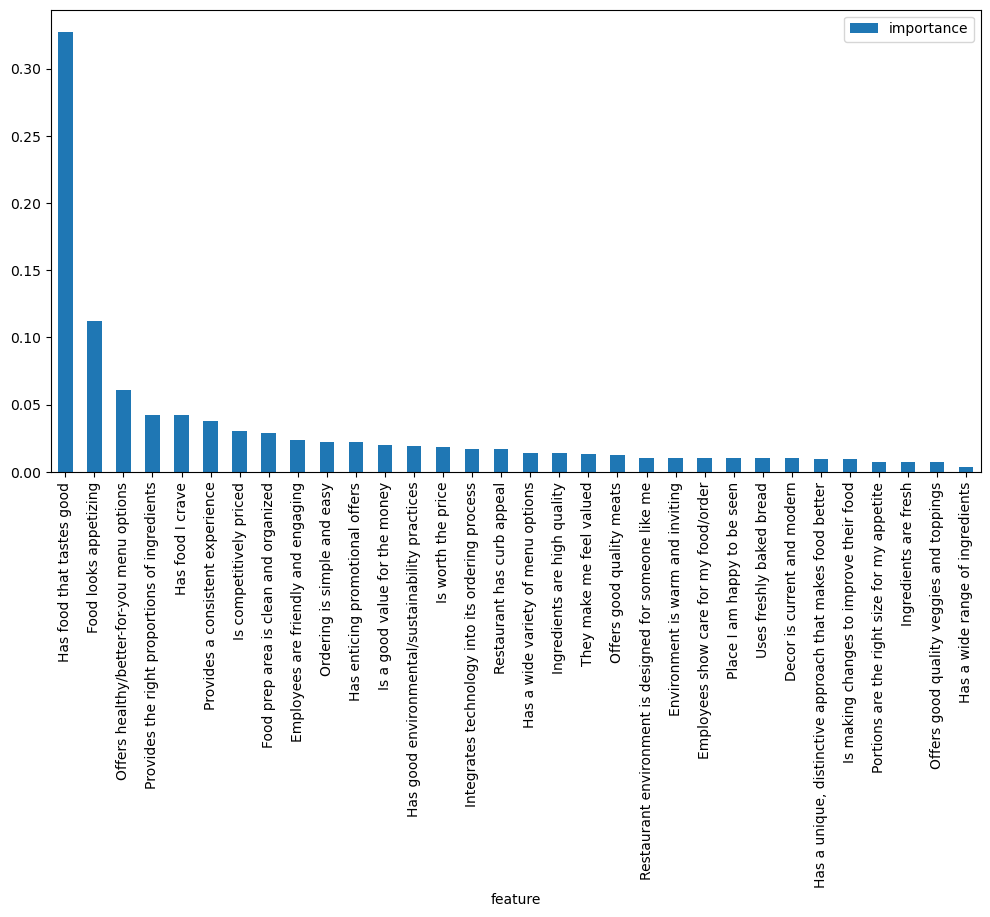

In [156]:
df_reg_feature_importance.plot(kind='bar', x='feature', y='importance', figsize=(12, 6))

In [157]:
df_reg_feature_importance.head()

,feature,importance
1,Has food that tastes good,0.327470
0,Food looks appetizing,0.112099
5,Offers healthy/better-for-you menu options,0.060902
3,Provides the right proportions of ingredients,0.042512
2,Has food I crave,0.041854


In [158]:
y_pred = dt_reg.predict(X_test)

In [159]:
mse = mean_squared_error(y_test, y_pred)
R2_Score = r2_score(y_test, y_pred)

In [160]:
mse,R2_Score  # bad result

(1.552066115702479, 0.20999165623696292)

### Random Forest Regressor

In [161]:
rf_reg = RandomForestRegressor()

In [162]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [163]:
reg_feature_importance = rf_reg.feature_importances_

In [164]:
df_reg_feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': reg_feature_importance}).sort_values(by='importance', ascending=False)

In [165]:
y_pred = rf_reg.predict(X_test)

In [166]:
mse = mean_squared_error(y_test, y_pred)

In [167]:
R2_Score = r2_score(y_test,y_pred)

In [168]:
mse,R2_Score # bad result

(0.9517559985199491, 0.5155520937863102)

### Xgboost Regressor

In [169]:
from xgboost import XGBRegressor

In [170]:
xgb_reg = XGBRegressor()

In [171]:
xgb_reg.fit(X_train, y_train)
reg_feature_importance = xgb_reg.feature_importances_

In [172]:
df_reg_feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': reg_feature_importance}).sort_values(by='importance', ascending=False)

In [173]:
y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
R2_Score = r2_score(y_test,y_pred)

In [174]:
mse,R2_Score # bad result

(0.9517559985199491, 0.5155520937863102)

### AdaBoost Regressor

In [175]:
from sklearn.ensemble import AdaBoostRegressor

In [176]:
ada_reg = AdaBoostRegressor()
xgb_reg.fit(X_train, y_train)
reg_feature_importance = xgb_reg.feature_importances_
df_reg_feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': reg_feature_importance}).sort_values(by='importance', ascending=False)

In [177]:
y_pred = rf_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
R2_Score = r2_score(y_test,y_pred)

In [178]:
mse,R2_Score # bad result

(0.9517559985199491, 0.5155520937863102)